### Tratamento

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himelsarder/road-accident-survival-dataset")

print("Path to dataset files:", path)

c:\Users\carlo\OneDrive\Área de Trabalho\Faculdade\ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.19k/1.19k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\carlo\.cache\kagglehub\datasets\himelsarder\road-accident-survival-dataset\versions\1


In [4]:
import pandas as pd

data = pd.read_csv(path + "/accident.csv")
data

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [ ]:
# encode columns

data['Helmet_Used_code'] = data['Helmet_Used'].map({'Yes': 1, 'No': 0})
data['Seatbelt_Used_code'] = data['Seatbelt_Used'].map({'Yes': 1, 'No': 0})
data['Gender_code'] = data['Gender'].map({'Male': 1, 'Female': 0})

data_coded = data.drop(columns=['Helmet_Used', 'Seatbelt_Used', 'Gender'], axis=1)
data_coded


,Age,Speed_of_Impact,Survived,Helmet_Used_code,Seatbelt_Used_code,Gender_code
0,56,27.0,1,0,0,0.0
1,69,46.0,1,0,1,0.0
2,46,46.0,0,1,1,1.0
3,32,117.0,0,0,1,1.0
4,60,40.0,0,1,1,0.0
...,...,...,...,...,...,...
195,69,111.0,1,0,1,0.0
196,30,51.0,1,0,1,0.0
197,58,110.0,1,0,1,1.0
198,20,103.0,1,0,1,1.0


In [10]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

data_coded[['Age_norm', 'Speed_of_Impact_norm']] = scaller.fit_transform(data_coded[['Age', 'Speed_of_Impact']])

data_norm = data_coded.drop(columns=['Age', 'Speed_of_Impact'], axis=1)

data_norm

,Survived,Helmet_Used_code,Seatbelt_Used_code,Gender_code,Age_norm,Speed_of_Impact_norm
0,1,0,0,0.0,0.843704,-1.445705
1,1,0,1,0.0,1.715924,-0.813399
2,0,1,1,1.0,0.172767,-0.813399
3,0,0,1,1.0,-0.766547,1.549429
4,0,1,1,0.0,1.112080,-1.013075
...,...,...,...,...,...,...
195,1,0,1,0.0,1.715924,1.349753
196,1,0,1,0.0,-0.900734,-0.647003
197,1,0,1,1.0,0.977892,1.316474
198,1,0,1,1.0,-1.571672,1.083519


### Análise

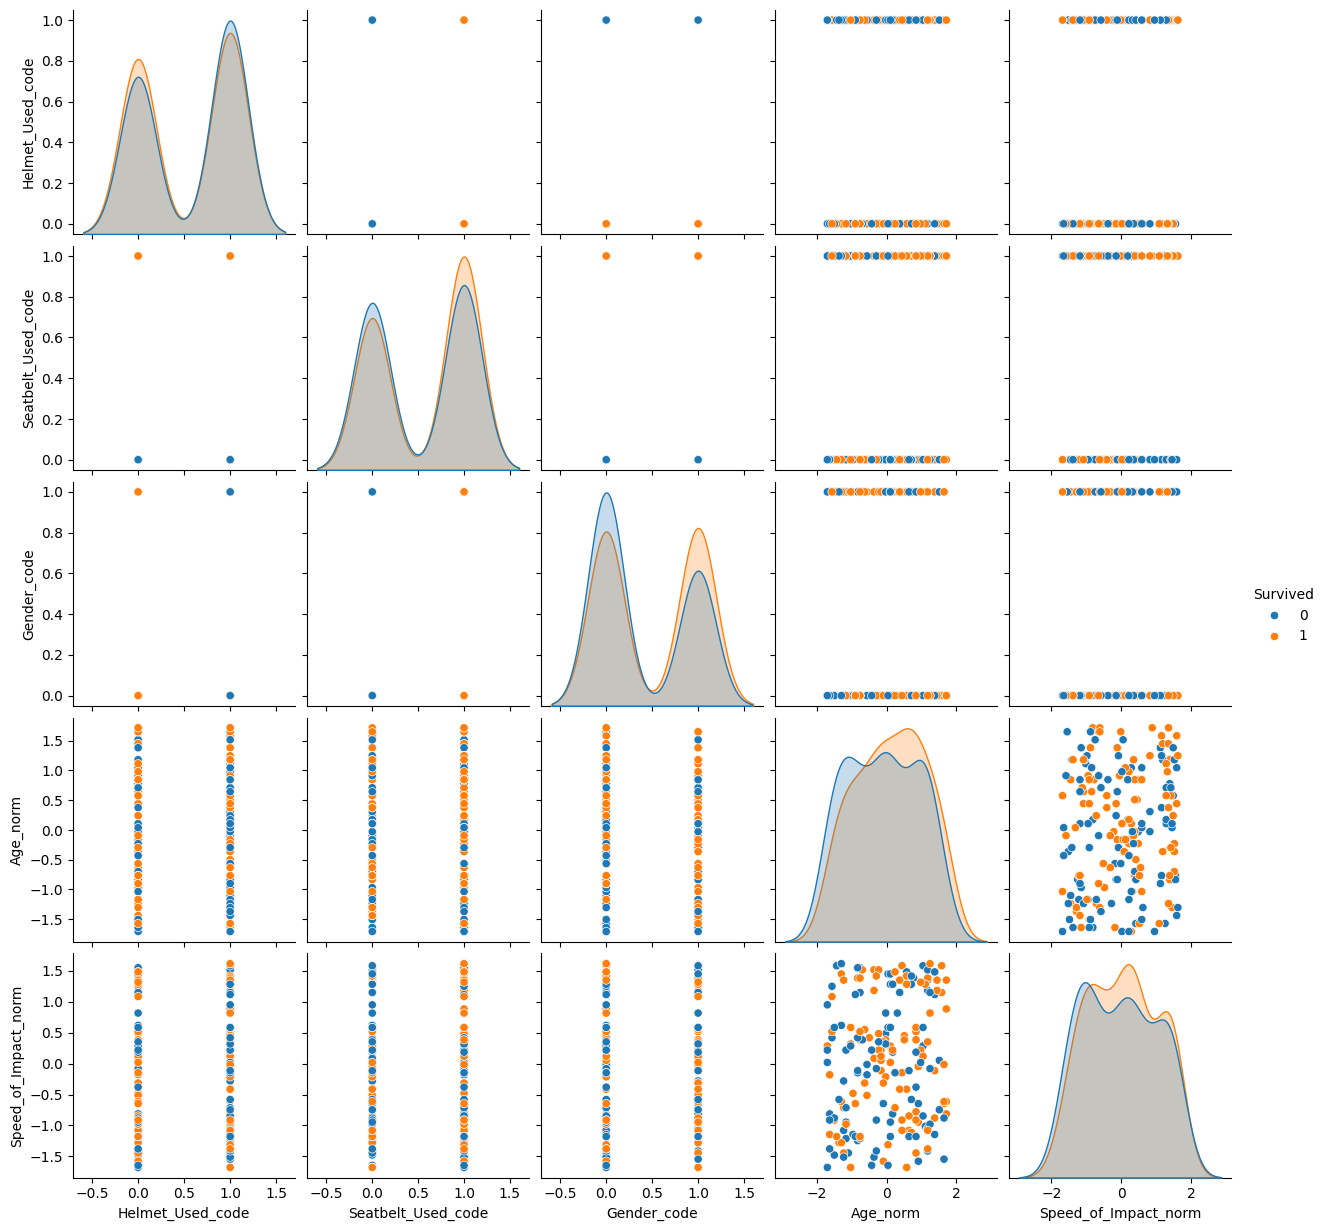

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_norm, hue='Survived')
plt.show()

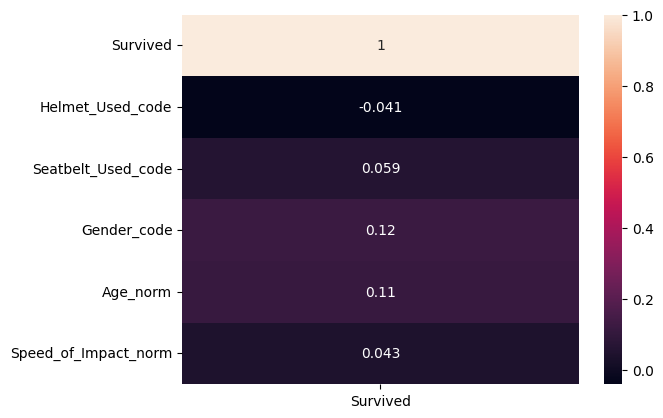

In [19]:
# corr matrix

sns.heatmap(data_norm.corr()[['Survived']], annot=True)
plt.show()

In [20]:
data_ml = data_norm.drop(columns=['Gender_code', 'Age_norm'], axis=1)
data_ml

,Survived,Helmet_Used_code,Seatbelt_Used_code,Speed_of_Impact_norm
0,1,0,0,-1.445705
1,1,0,1,-0.813399
2,0,1,1,-0.813399
3,0,0,1,1.549429
4,0,1,1,-1.013075
...,...,...,...,...
195,1,0,1,1.349753
196,1,0,1,-0.647003
197,1,0,1,1.316474
198,1,0,1,1.083519
